グラフで表示されているrewardの値が異常に大きいがその理由がなぜかを追及する。

In [34]:
import pickle
import torch

import numpy as np
from settings.shift_funcs import get_funcs
from matplotlib import pyplot as plt
SEED = 0

In [35]:
data = np.load('data/shift1/diag_xf_yf_dataset.npz')
train_dataset = data['train_dataset']
train_dataset = torch.from_numpy(train_dataset).to(torch.float)
original_dataset = data['original_dataset']
original_dataset = torch.from_numpy(original_dataset).to(torch.float)

In [36]:
# train_datasetとoriginal_datasetの先頭の画像のMSE
t = train_dataset[0]
o = original_dataset[0]

torch.mean((t - o)**2)

tensor(0.2446)

In [37]:
funcs = [get_funcs(*p) for p in [(1, 1), (1, 0), (0, 1)]]

d = o.clone()
for _ in range(1):
    d = funcs[0][0](d)
d = torch.from_numpy(d)
torch.sqrt(torch.mean((d - o)**2))

tensor(0.2787)

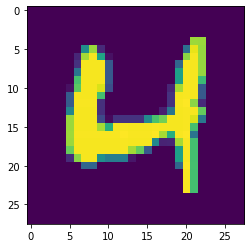

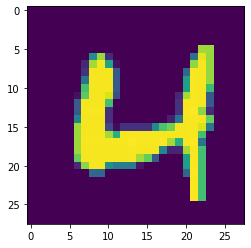

In [27]:
plt.imshow(o)
plt.show()

plt.imshow(d)
plt.show()